In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.pandas.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv("output_data.csv")
df.head()

,SrNo,Date_yyyy_mm_dd,StartupName,IndustryVertical,SubVertical,CityLocation,InvestorsName,InvestmentType,AmountinUSD,Remarks
0,1,2020-01-09,BYJU’S,E-Tech,E-learning,Bengaluru,Tiger Global Management,Private Equity Round,200000000.0,NaN
1,2,2020-01-13,Shuttl,Transportation,App based shuttle service,Gurgaon,Susquehanna Growth Equity,Series C,8048394.0,NaN
2,3,2020-01-09,Mamaearth,E-commerce,Retailer of baby and toddler products,Bengaluru,Sequoia Capital India,Series B,18358860.0,NaN
3,4,2020-01-02,https://www.wealthbucket.in/,FinTech,Online Investment,New Delhi,Vinod Khatumal,Pre-series A,3000000.0,NaN
4,5,2020-01-02,Fashor,Fashion and Apparel,Embroiled Clothes For Women,Mumbai,Sprout Venture Partners,Seed Round,1800000.0,NaN


In [4]:
df.dtypes

SrNo                  int64
Date_yyyy_mm_dd      object
StartupName          object
IndustryVertical     object
SubVertical          object
CityLocation         object
InvestorsName        object
InvestmentType       object
AmountinUSD         float64
Remarks              object
dtype: object

### MISSING VALUES

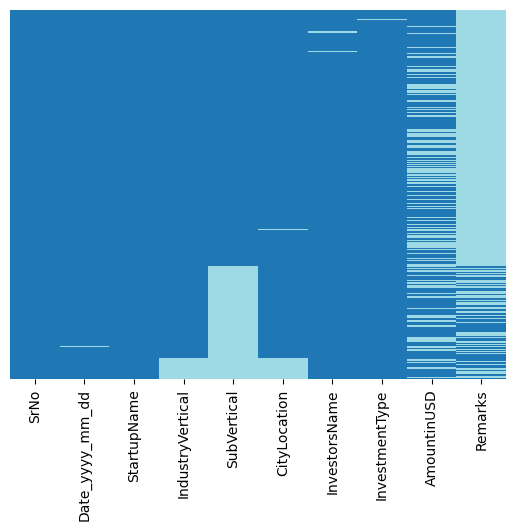

In [5]:
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='tab20')
plt.show()

<div class = "alert alert-block alert-success">
    The light blue section represents the missing values. We can observe that there are multiple missing values, so let's try to find their exact percentage.
</div>

In [6]:
# Finding the percentage of NaN values in each feature

features_with_nan = [feature for feature in df.columns if df[feature].isnull().sum()>1]

for feature in features_with_nan:
    print(f"{feature:<17} : {100*(np.round(df[feature].isnull().mean(), 4))}")

<IPython.core.display.Javascript object>

Date_yyyy_mm_dd   : 0.26


<IPython.core.display.Javascript object>

IndustryVertical  : 5.62


<IPython.core.display.Javascript object>

SubVertical       : 30.75


<IPython.core.display.Javascript object>

CityLocation      : 5.91


<IPython.core.display.Javascript object>

InvestorsName     : 0.79


<IPython.core.display.Javascript object>

InvestmentType    : 0.13


<IPython.core.display.Javascript object>

AmountinUSD       : 32.16


<IPython.core.display.Javascript object>

Remarks           : 86.24000000000001


<IPython.core.display.Javascript object>

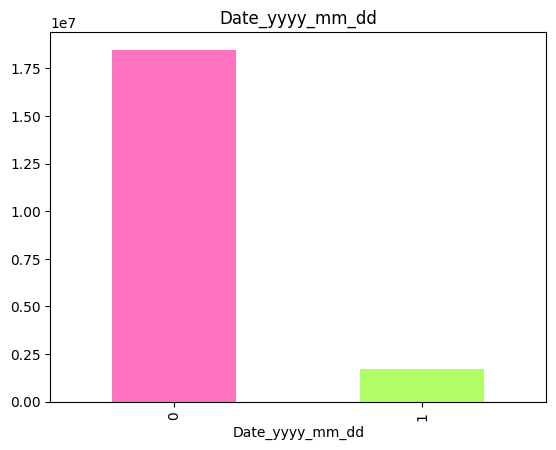

<IPython.core.display.Javascript object>

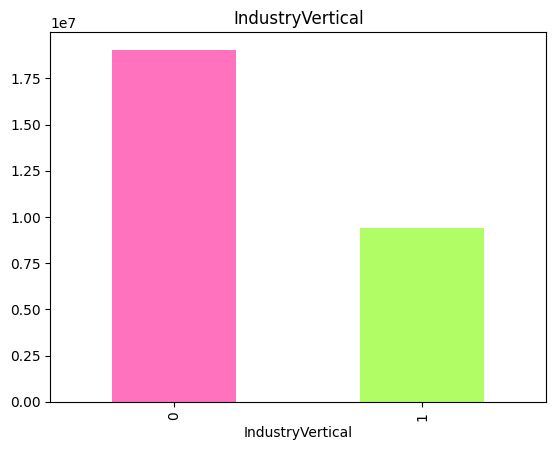

<IPython.core.display.Javascript object>

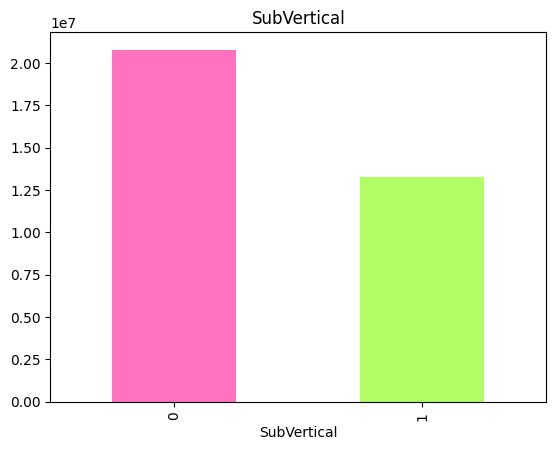

<IPython.core.display.Javascript object>

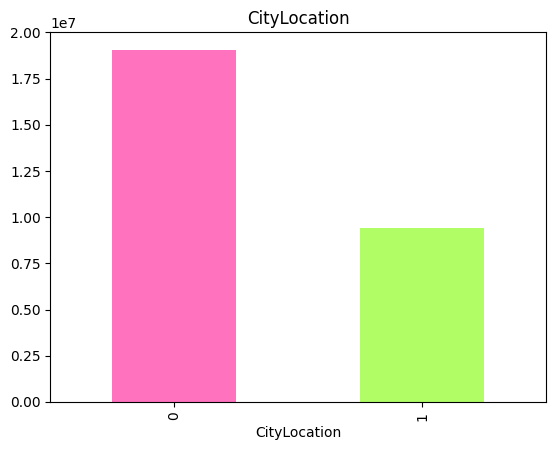

<IPython.core.display.Javascript object>

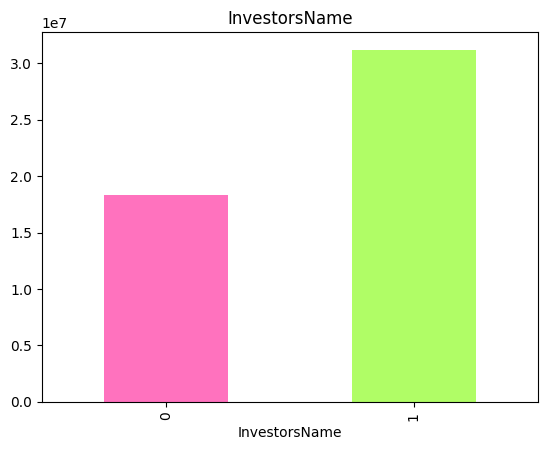

<IPython.core.display.Javascript object>

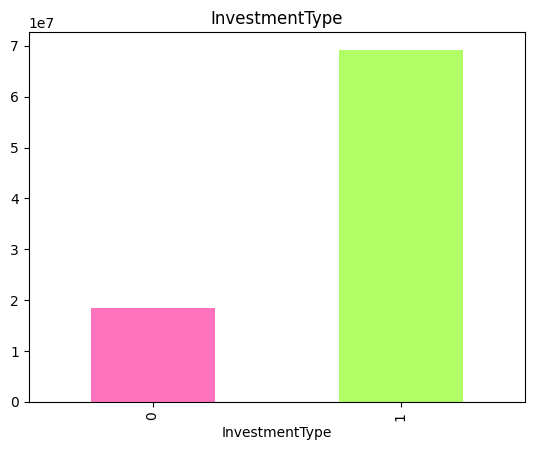

<IPython.core.display.Javascript object>

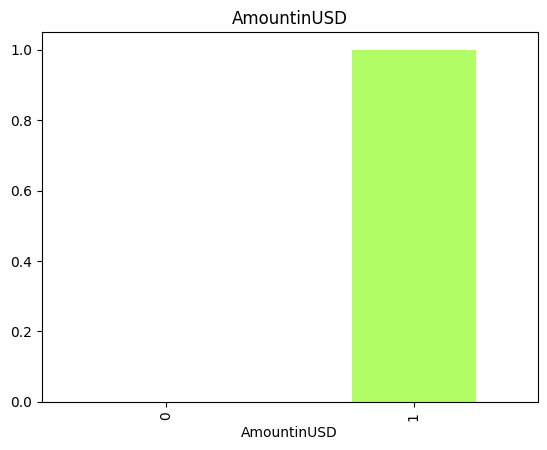

<IPython.core.display.Javascript object>

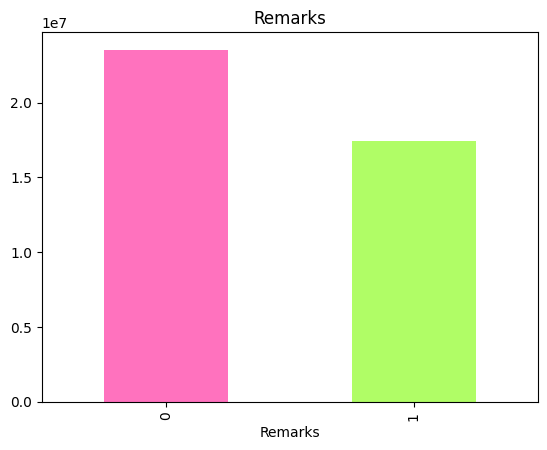

In [7]:
# Finding the relationship between the missing values and the Sales Price

for feature in features_with_nan:
    data = df.copy()
    data[feature] = np.where(data[feature].isnull(), 1, 0)
    # Where there is null value, there is 1, otherwise 0
    data.groupby(feature)['AmountinUSD'].mean().plot.bar(color = ['deeppink', 'lawngreen'], alpha=0.6)
    plt.title(feature)
    plt.show()

In [8]:
print("Count of startups is {}".format(len(df.SrNo)))

Count of startups is 3044


### NUMERICAL VARIABLES

In [9]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print("Number of numerical features : ", len(numerical_features))
df[numerical_features].head()

Number of numerical features :  2


,SrNo,AmountinUSD
0,1,200000000.0
1,2,8048394.0
2,3,18358860.0
3,4,3000000.0
4,5,1800000.0


#### TEMPORAL VARIABLES

<div class = "alert alert-block alert-warning">
    The Date feature should not be object datatype, it should be a datetime feature. Let's fix it.
</div>

In [10]:
df['Date_yyyy_mm_dd'] = pd.to_datetime(df['Date_yyyy_mm_dd'], yearfirst=True)
df['Date_yyyy_mm_dd'].head()

0   2020-01-09
1   2020-01-13
2   2020-01-09
3   2020-01-02
4   2020-01-02
Name: Date_yyyy_mm_dd, dtype: datetime64[ns]

In [11]:
print(len(df['Date_yyyy_mm_dd'].unique()))

1029


In [12]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

print("Number of numerical features : ", len(numerical_features))
df[numerical_features].head()

Number of numerical features :  3


,SrNo,Date_yyyy_mm_dd,AmountinUSD
0,1,2020-01-09,200000000.0
1,2,2020-01-13,8048394.0
2,3,2020-01-09,18358860.0
3,4,2020-01-02,3000000.0
4,5,2020-01-02,1800000.0


<div class = "alert alert-block alert-warning">
    Let's check if there is any relationship between the Date feature and the AmountinUSD.
</div>

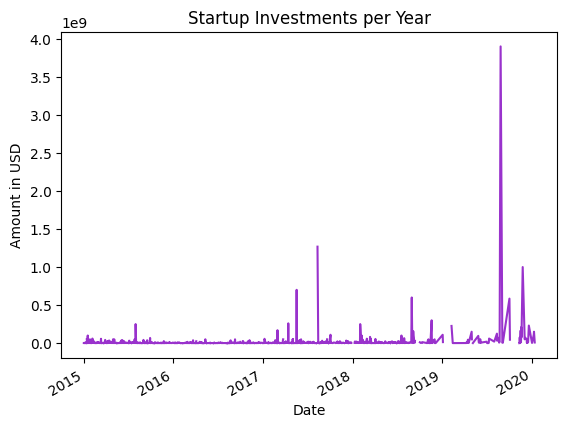

In [13]:
df.groupby('Date_yyyy_mm_dd')['AmountinUSD'].median().plot(color='darkorchid')
plt.title('Startup Investments per Year')
plt.xlabel('Date')
plt.ylabel('Amount in USD')
plt.show()

<div class= "alert alert-block alert-success">
    Clear observation: Startup investment skyrocketed at the end of 2019.
</div>

#### DISCRETE VARIABLES

In [14]:
discrete_features = [feature for feature in df.columns if len(df[feature].unique())<25 and feature not in ['SrNo', 'Date_yyyy_mm_dd']]
print("Discrete variable count = ", len(discrete_features))

Discrete variable count =  0


#### CONTINUOUS VARIABLES

In [15]:
continuous_features = [feature for feature in numerical_features if feature not in discrete_features + ['SrNo', 'Date_yyyy_mm_dd']]
print("Continuous variable count =  {}".format(len(continuous_features)))

Continuous variable count =  1


In [16]:
continuous_features

['AmountinUSD']

### CATEGORICAL VARIABLES

In [17]:
cat_features = [feature for feature in df.columns if df[feature].dtype=='O']
cat_features

['StartupName',
 'IndustryVertical',
 'SubVertical',
 'CityLocation',
 'InvestorsName',
 'InvestmentType',
 'Remarks']

In [18]:
# Cardinality of categorical features

for feature in cat_features:
    print(f"{feature:16} : {len(df[feature].unique())}")

StartupName      : 2459
IndustryVertical : 822
SubVertical      : 1943
CityLocation     : 113
InvestorsName    : 2413
InvestmentType   : 56
Remarks          : 73


<div class = 'alert alert-block alert-warning'>
    Let's try drawing some insights from this data now.
</div>

In [19]:
print(df.describe(include='all'))

               SrNo                Date_yyyy_mm_dd StartupName  \
count   3044.000000                           3036        3044   
unique          NaN                            NaN        2459   
top             NaN                            NaN    Ola Cabs   
freq            NaN                            NaN           8   
mean    1522.500000  2016-09-23 03:38:39.367588864         NaN   
min        1.000000            2015-01-02 00:00:00         NaN   
25%      761.750000            2015-11-04 00:00:00         NaN   
50%     1522.500000            2016-07-15 00:00:00         NaN   
75%     2283.250000            2017-06-12 06:00:00         NaN   
max     3044.000000            2020-01-13 00:00:00         NaN   
std      878.871435                            NaN         NaN   

         IndustryVertical              SubVertical CityLocation  \
count                2873                     2108         2864   
unique                821                     1942          112   
top   

### TOTAL FUNDING BY YEAR

<div class = 'alert alert-block alert-success'>
Tracks how much money was invested in Indian startups year by year. Highlights whether funding activity is growing, stable, or declining over time.
</div>

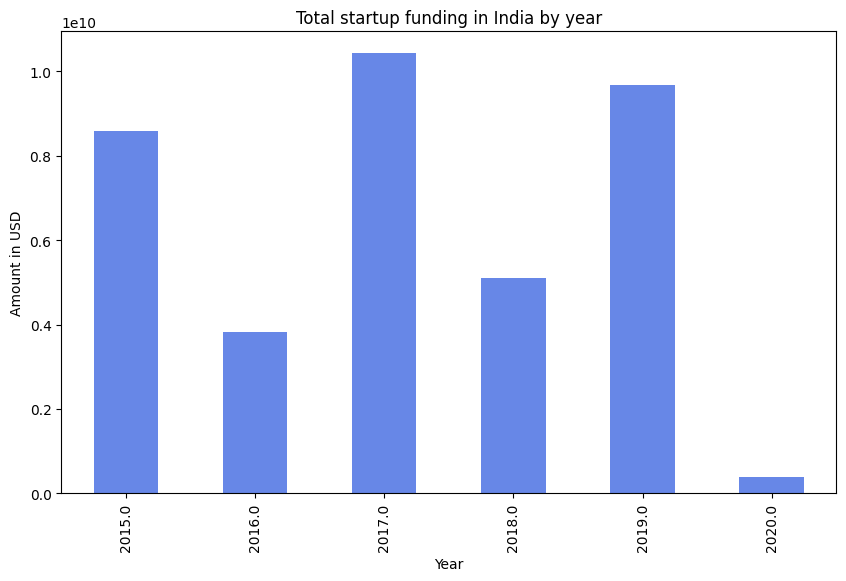

In [20]:
df['Year'] = df['Date_yyyy_mm_dd'].dt.year
funding_by_year = df.groupby('Year')['AmountinUSD'].sum().sort_index()

plt.figure(figsize=(10,6))
funding_by_year.plot(kind='bar', color='royalblue', alpha=0.8)
plt.title("Total startup funding in India by year")
plt.xlabel('Year')
plt.ylabel('Amount in USD')
plt.show()

### TOP 10 MOST FUNDED STARTUPS

<div class = 'alert alert-block alert-success'>
    Shows the startups that raised the highest cumulative funding amounts. Useful for identifying big investors.
</div>

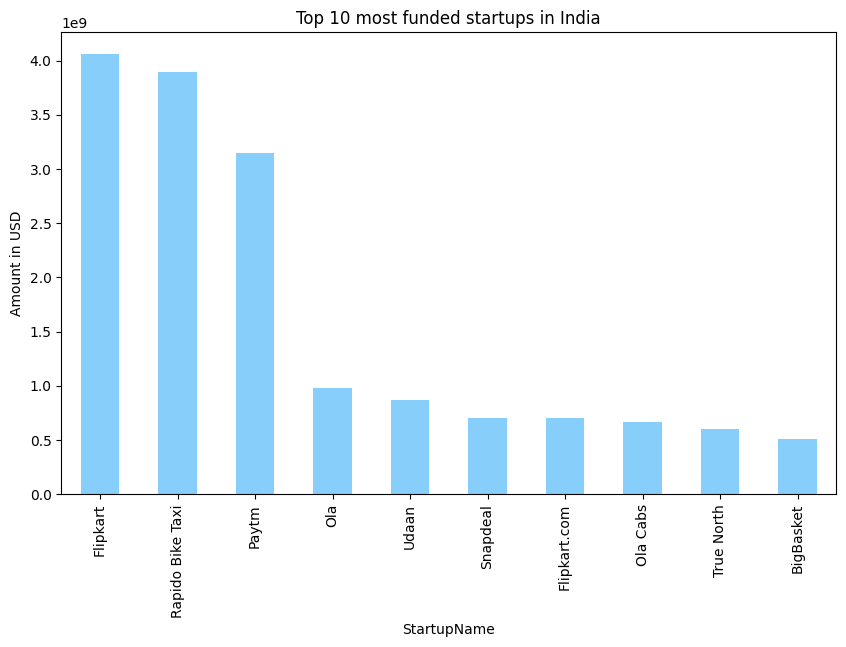

In [21]:
top_startups = (df.groupby('StartupName')['AmountinUSD'].sum().sort_values(ascending=False).head(10))
top_startups.plot(kind='bar', figsize=(10,6), color='lightskyblue')
plt.title("Top 10 most funded startups in India")
plt.ylabel("Amount in USD")
plt.show()

### TOP FUNDED CITIES

<div class='alert alert-block alert-success'>
    Displays which cities attracted the largest share of startup funding. Helps reveal geographical hubs of entrepreneurship and investor confidence.
</div>

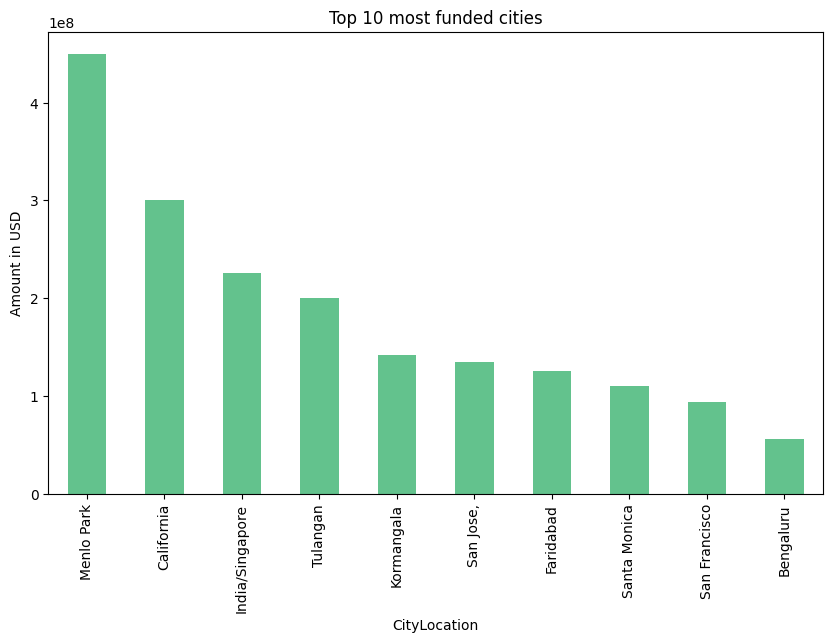

In [22]:
top_cities = (df.groupby('CityLocation')['AmountinUSD'].mean().sort_values(ascending=False).head(10))
top_cities.plot(kind='bar', figsize=(10,6), color='mediumseagreen', alpha=0.8)
plt.title("Top 10 most funded cities")
plt.ylabel("Amount in USD")
plt.show()

### MOST ACTIVE INVESTORS

<div class = 'alert alert-block alert-success'>
    Lists the investors who participated in the highest number of funding rounds.
</div>

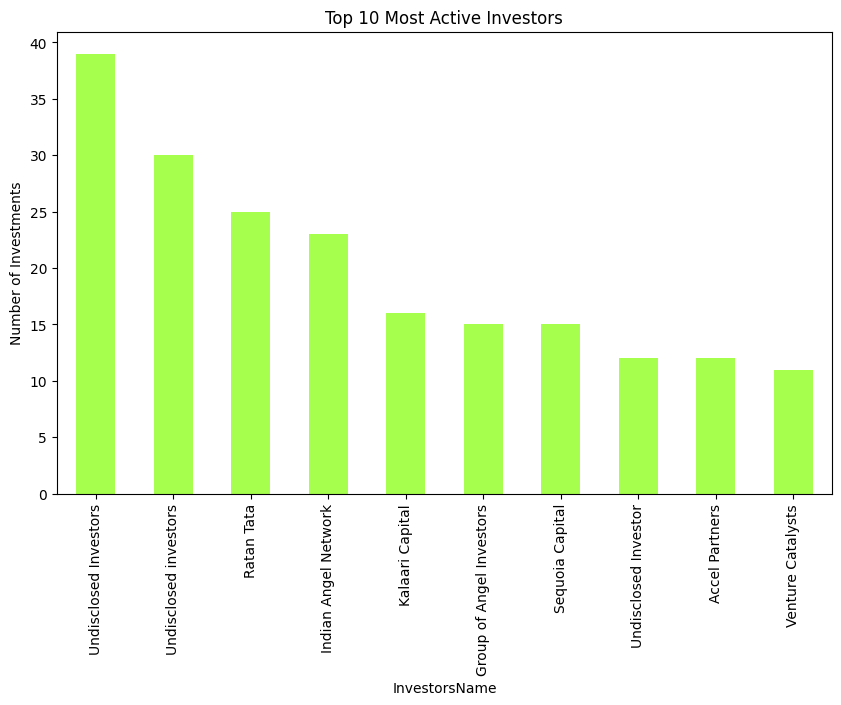

In [23]:
investor_counts = (df['InvestorsName'].value_counts().head(10))
investor_counts.plot(kind='bar', figsize=(10,6), color='chartreuse', alpha=0.7)
plt.title('Top 10 Most Active Investors')
plt.ylabel('Number of Investments')
plt.show()

### TOP FUNDED STARTUP SECTORS

<div class='alert alert-block alert-success'>
    Highlights which sectors attracted the most investor interest.
</div>

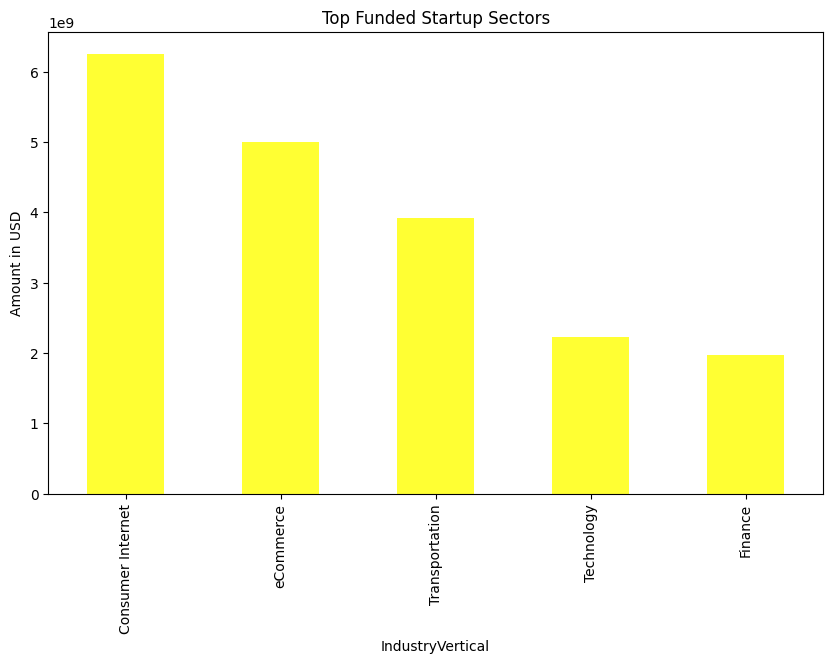

In [24]:
top_sectors = (df.groupby('IndustryVertical')['AmountinUSD'].sum().sort_values(ascending=False).head(5))
top_sectors.plot(kind='bar', figsize=(10,6), color='yellow', alpha=0.8)
plt.title("Top Funded Startup Sectors")
plt.ylabel("Amount in USD")
plt.show()

### Top 10 Startups by Number of Funding Rounds

<div class='alert alert-block alert-success'>
Identifies startups that consistently attracted multiple funding rounds over time, reflecting sustained investor confidence and growth potential.
</div>

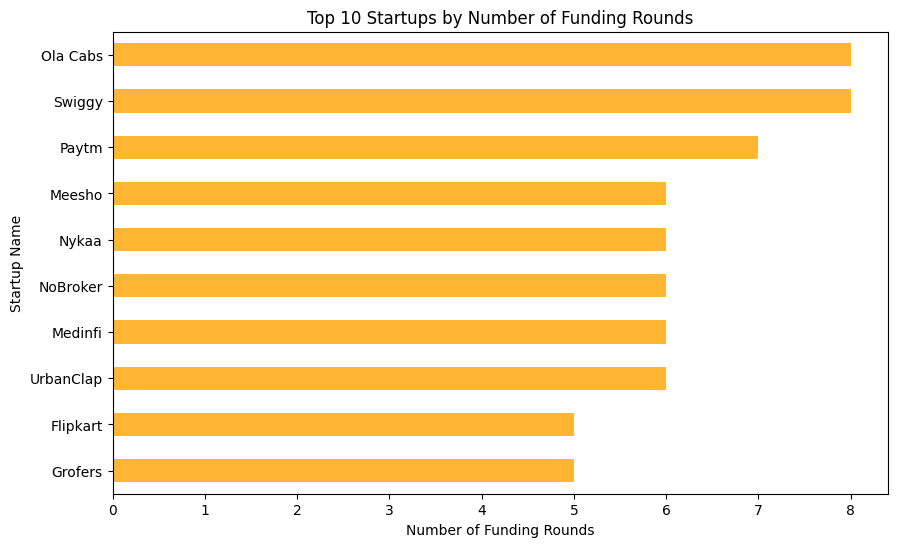

In [25]:
startup_rounds = df['StartupName'].value_counts().head(10)
plt.figure(figsize=(10,6))
startup_rounds.plot(kind='barh', color='orange', alpha=0.8)
plt.xlabel("Number of Funding Rounds")
plt.ylabel("Startup Name")
plt.gca().invert_yaxis()
plt.title("Top 10 Startups by Number of Funding Rounds")
plt.show()

### FUNDING TREND OVER TIME

<div class='alert alert-block alert-success'>
Yearly line chart showing how funding amounts evolved over time. Useful for spotting booms, slowdowns.
</div>

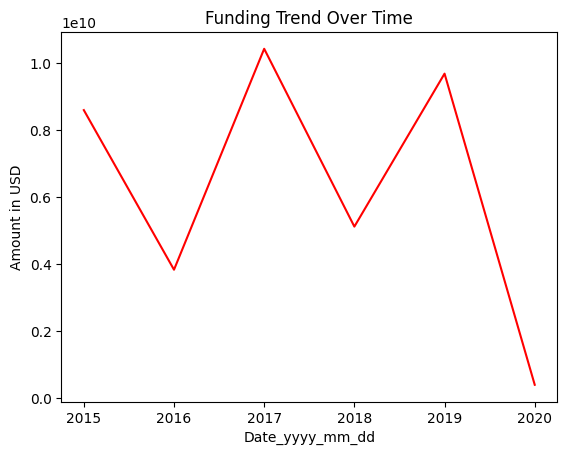

In [26]:
df.groupby(df['Date_yyyy_mm_dd'].dt.year)['AmountinUSD'].sum().plot(kind='line', color='red')
plt.title("Funding Trend Over Time")
plt.ylabel('Amount in USD')
plt.show()